In [1]:
# import packages
import pickle
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 2000)

pd.set_option('display.float_format',lambda x : '%.2f' % x)
import numpy as np
from collections import OrderedDict
from functools import reduce
from datetime import date, datetime, timedelta
import warnings
warnings.filterwarnings("ignore")

# 绘图
import matplotlib.pyplot as plt
import seaborn as sns
# from pylab import *
# mpl.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.sans-serif']=['Simhei']
# import matplotlib as mpl
# mpl.rcParams['font.sans-serif'] = ['KaiTi']
# mpl.rcParams['font.serif'] = ['KaiTi']

# 数据处理

In [2]:
# import data
df_wenjuan = pd.read_csv('./multipleChoiceResponses.csv', encoding='GBK')
df_target_cols = pd.read_csv('./columeName.csv', encoding='GBK')

print(df_wenjuan.shape)
df_target_cols

(16716, 228)


,EngName,Colnames
0,Age,受访者年龄
1,EmploymentStatus,就业情况
2,CurrentJobTitleSelect,当前职称
3,MLToolNextYearSelect,明年将学习机器学习工具
4,MLMethodNextYearSelect,明年将学习机器学习方法
5,LanguageRecommendationSelect,首选推荐编程语言
6,JobSkillImportanceBigData,大数据在工作的重要度
7,JobSkillImportanceDegree,学位在工作的重要程度
8,JobSkillImportanceEnterpriseTools,企业工具在工作中的重要度
9,JobSkillImportancePython,python在工作中的重要度


In [3]:
# 从调查问卷表中选出目标列
df_target_data =df_wenjuan[df_target_cols['EngName'].to_list()]
df_target_data.head()

,Age,EmploymentStatus,CurrentJobTitleSelect,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,JobSkillImportanceBigData,JobSkillImportanceDegree,JobSkillImportanceEnterpriseTools,JobSkillImportancePython,JobSkillImportanceR,JobSkillImportanceSQL,JobSkillImportanceKaggleRanking,JobSkillImportanceVisualizations,DataScienceIdentitySelect,FormalEducation,Tenure,JobSatisfaction
0,nan,Employed full-time,DBA/Database Engineer,SAS Base,Random Forests,F#,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Bachelor's degree,More than 10 years,5
1,30.00,"Not employed, but looking for work",NaN,Python,Random Forests,Python,NaN,Nice to have,NaN,Unnecessary,NaN,Necessary,NaN,NaN,Yes,Master's degree,Less than a year,NaN
2,28.00,"Not employed, but looking for work",NaN,Amazon Web services,Deep learning,R,Necessary,NaN,NaN,NaN,Necessary,NaN,NaN,NaN,Yes,Master's degree,3 to 5 years,NaN
3,56.00,"Independent contractor, freelancer, or self-em...",Operations Research Practitioner,TensorFlow,Neural Nets,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Master's degree,More than 10 years,10 - Highly Satisfied
4,38.00,Employed full-time,Computer Scientist,TensorFlow,Text Mining,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Doctoral degree,More than 10 years,2


In [4]:
# 判断每一列数据的缺失值
for i in df_target_data.columns:
    print('%s列数据缺失率：%.2f%%'%(i,df_target_data[df_target_data[i].isna()].shape[0] *100 / df_target_data.shape[0]))

Age列数据缺失率：1.98%
EmploymentStatus列数据缺失率：0.00%
CurrentJobTitleSelect列数据缺失率：29.23%
MLToolNextYearSelect列数据缺失率：34.21%
MLMethodNextYearSelect列数据缺失率：35.19%
LanguageRecommendationSelect列数据缺失率：34.21%
JobSkillImportanceBigData列数据缺失率：76.33%
JobSkillImportanceDegree列数据缺失率：76.62%
JobSkillImportanceEnterpriseTools列数据缺失率：77.90%
JobSkillImportancePython列数据缺失率：75.89%
JobSkillImportanceR列数据缺失率：76.41%
JobSkillImportanceSQL列数据缺失率：76.72%
JobSkillImportanceKaggleRanking列数据缺失率：76.85%
JobSkillImportanceVisualizations列数据缺失率：76.87%
DataScienceIdentitySelect列数据缺失率：24.20%
FormalEducation列数据缺失率：10.18%
Tenure列数据缺失率：19.05%
JobSatisfaction列数据缺失率：60.06%


从统计上来看，总体上缺失率都小于80%；但是job skill importance那几列的缺失率较高，接近80%。

# 分析部分

## 每个年龄段的就业情况

In [5]:
# 大致查看一下年龄分布
df_target_data.Age.value_counts().sort_index()

0.00       10
1.00        4
2.00        1
3.00        2
4.00        1
6.00        2
9.00        1
10.00       1
11.00       3
12.00       1
13.00       3
14.00       6
15.00      13
16.00      24
17.00      42
18.00      78
19.00     193
20.00     395
21.00     584
22.00     694
23.00     839
24.00     898
25.00     969
26.00     886
27.00     842
28.00     761
29.00     731
30.00     778
31.00     597
32.00     560
33.00     530
34.00     531
35.00     577
36.00     398
37.00     384
38.00     354
39.00     320
40.00     366
41.00     223
42.00     255
43.00     198
44.00     199
45.00     226
46.00     144
47.00     166
48.00     158
49.00     132
50.00     189
51.00     100
52.00     132
53.00      83
54.00      74
55.00      91
56.00      76
57.00      88
58.00      55
59.00      49
60.00      56
61.00      38
62.00      29
63.00      42
64.00      21
65.00      28
66.00      24
67.00      19
68.00      16
69.00      16
70.00      22
71.00       5
72.00       7
73.00       6
74.00 

In [6]:
# 大致看一下就业情况分布
df_target_data.EmploymentStatus.value_counts()

Employed full-time                                      10897
Not employed, but looking for work                       2110
Independent contractor, freelancer, or self-employed     1330
Not employed, and not looking for work                    924
Employed part-time                                        917
I prefer not to say                                       420
Retired                                                   118
Name: EmploymentStatus, dtype: int64

In [7]:
# 先对年龄进行分组
df_target_data['age_status'] = pd.cut(df_target_data.Age, 
                                      bins=[0,10,20,30,40,50,60,70,80,90,100],
                                      labels=['01_10岁以下', '02_10到20岁', '03_20到30岁', '04_30到40岁', '05_40到50岁','06_50到60岁','07_60到70岁','08_70到80岁','09_80到90岁','10_90到100岁'])
# 有小部分的用户没写年龄，把这部分的人年龄都填成未知
df_target_data['age_status'].replace({np.nan:'11_未知'}, inplace=True)
# 设置一列定位键
df_target_data['age_1'] = 1

In [8]:
# 对工作情况进行分类
# 这里认为，只有正在被雇佣的才是有工作的，退休和不想说的那部分都归类到没工作
df_target_data['employed'] = 0
df_target_data.loc[df_target_data['EmploymentStatus'].isin(['Employed full-time',
                                                            'Independent contractor, freelancer, or self-employed',
                                                            'Employed part-time']), 'employed'] = 1

In [9]:
df_target_data.head()

,Age,EmploymentStatus,CurrentJobTitleSelect,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,JobSkillImportanceBigData,JobSkillImportanceDegree,JobSkillImportanceEnterpriseTools,JobSkillImportancePython,JobSkillImportanceR,JobSkillImportanceSQL,JobSkillImportanceKaggleRanking,JobSkillImportanceVisualizations,DataScienceIdentitySelect,FormalEducation,Tenure,JobSatisfaction,age_status,age_1,employed
0,nan,Employed full-time,DBA/Database Engineer,SAS Base,Random Forests,F#,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Bachelor's degree,More than 10 years,5,11_未知,1,1
1,30.00,"Not employed, but looking for work",NaN,Python,Random Forests,Python,NaN,Nice to have,NaN,Unnecessary,NaN,Necessary,NaN,NaN,Yes,Master's degree,Less than a year,NaN,03_20到30岁,1,0
2,28.00,"Not employed, but looking for work",NaN,Amazon Web services,Deep learning,R,Necessary,NaN,NaN,NaN,Necessary,NaN,NaN,NaN,Yes,Master's degree,3 to 5 years,NaN,03_20到30岁,1,0
3,56.00,"Independent contractor, freelancer, or self-em...",Operations Research Practitioner,TensorFlow,Neural Nets,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Master's degree,More than 10 years,10 - Highly Satisfied,06_50到60岁,1,1
4,38.00,Employed full-time,Computer Scientist,TensorFlow,Text Mining,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Doctoral degree,More than 10 years,2,04_30到40岁,1,1


In [10]:
# 查看分布
t_age_job = df_target_data.groupby('age_status').agg({'employed':'sum','age_1':'sum'}).reset_index().rename({'age_1':'count'},axis=1)
# 计算受聘率
t_age_job['rate_of_employed'] = t_age_job['employed'] / t_age_job['count']
# 计算每个年龄阶段受雇人数占所有受雇人数的比重
t_age_job['per_of_employed'] = t_age_job['employed'] / t_age_job['employed'].sum()
t_age_job

,age_status,employed,count,rate_of_employed,per_of_employed
0,01_10岁以下,6,12,0.50,0.00
1,02_10到20岁,208,758,0.27,0.02
2,03_20到30岁,5840,7982,0.73,0.44
3,04_30到40岁,4231,4617,0.92,0.32
4,05_40到50岁,1718,1890,0.91,0.13
5,06_50到60岁,697,804,0.87,0.05
6,07_60到70岁,172,255,0.67,0.01
7,08_70到80岁,17,40,0.42,0.00
8,09_80到90岁,1,2,0.50,0.00
9,10_90到100岁,8,15,0.53,0.00


In [11]:
# 增加total行
t_age_job.loc['total','age_status'] = '总计'
t_age_job.loc['total','employed'] = t_age_job['employed'].sum()
t_age_job.loc['total','count'] = t_age_job['count'].sum()
t_age_job.loc['total','rate_of_employed'] = t_age_job.loc['total','employed'] / t_age_job.loc['total','count']
t_age_job.loc['total','per_of_employed'] = 1

In [12]:
t_age_job

,age_status,employed,count,rate_of_employed,per_of_employed
0,01_10岁以下,6.00,12.00,0.50,0.00
1,02_10到20岁,208.00,758.00,0.27,0.02
2,03_20到30岁,5840.00,7982.00,0.73,0.44
3,04_30到40岁,4231.00,4617.00,0.92,0.32
4,05_40到50岁,1718.00,1890.00,0.91,0.13
5,06_50到60岁,697.00,804.00,0.87,0.05
6,07_60到70岁,172.00,255.00,0.67,0.01
7,08_70到80岁,17.00,40.00,0.42,0.00
8,09_80到90岁,1.00,2.00,0.50,0.00
9,10_90到100岁,8.00,15.00,0.53,0.00


In [33]:
# 计算每个年龄阶段的TGI
# 举例：10到20岁的用户受雇的比例 / 总体受雇的比例 * 100 = 0.27 / 0.79 *100
t_age_job['tgi'] = t_age_job['rate_of_employed'] / t_age_job.loc['total','rate_of_employed']
t_age_job

,age_status,employed,count,rate_of_employed,per_of_employed,tgi
0,01_10岁以下,6.00,12.00,0.50,0.00,0.64
1,02_10到20岁,208.00,758.00,0.27,0.02,0.35
2,03_20到30岁,5840.00,7982.00,0.73,0.44,0.93
3,04_30到40岁,4231.00,4617.00,0.92,0.32,1.17
4,05_40到50岁,1718.00,1890.00,0.91,0.13,1.16
5,06_50到60岁,697.00,804.00,0.87,0.05,1.10
6,07_60到70岁,172.00,255.00,0.67,0.01,0.86
7,08_70到80岁,17.00,40.00,0.42,0.00,0.54
8,09_80到90岁,1.00,2.00,0.50,0.00,0.64
9,10_90到100岁,8.00,15.00,0.53,0.00,0.68


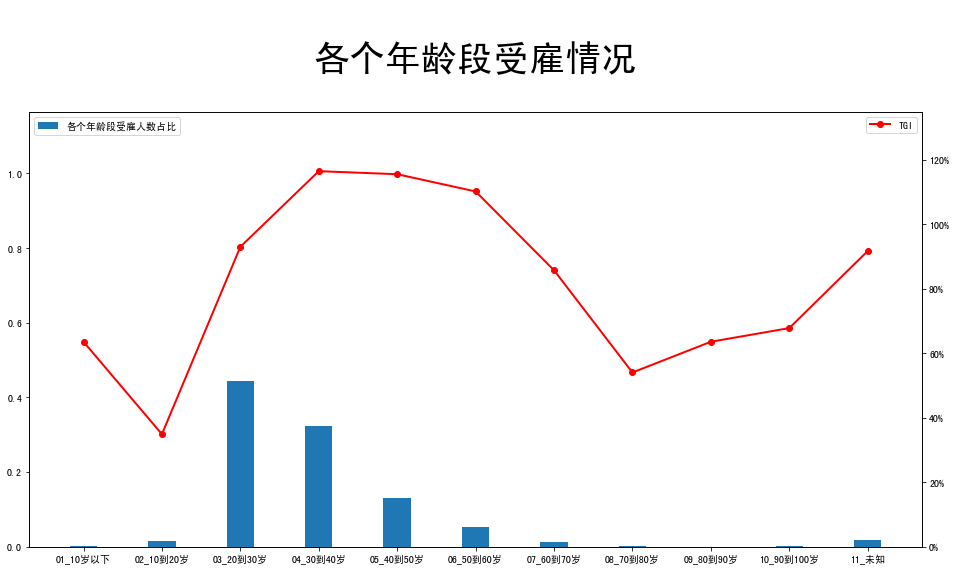

In [35]:
# 画图

x = t_age_job[t_age_job['age_status']!='总计'].age_status
y1 = t_age_job[t_age_job['age_status']!='总计'].per_of_employed
y2 = t_age_job[t_age_job['age_status']!='总计'].tgi

plt.figure(figsize=(16,8))
plt.subplot(111)
 
# 柱形宽度
bar_width = 0.35
 
# 在主坐标轴绘制柱形图
plt.bar(x,y1,bar_width,label='各个年龄段受雇人数占比')
 
# 设置坐标轴的取值范围，避免柱子过高而与图例重叠
plt.ylim(0,max(y1.max(),y2.max()))
 
# 设置图例
plt.legend(loc='upper left')
 
# 设置横坐标的标签
plt.xticks(x)
 
# 在次坐标轴上绘制折线图
plt.twinx()
# ls:线的类型，lw：宽度，o：在顶点处实心圈
plt.plot(x,y2,ls='-',lw=2,color='r',marker='o',label='TGI')
 
# 设置次坐标轴的取值范围，避免折线图波动过大
plt.ylim(0,1.35)
 
# 设置图例
plt.legend()
 
# 定义显示百分号的函数
def to_percent(number, position=0):
    return '%.f' % (number * 100) + '%'
 
# 次坐标轴的标签显示百分号 FuncFormatter：自定义格式函数包
from matplotlib.ticker import FuncFormatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
 
# 设置标题
plt.title('\n各个年龄段受雇情况\n',fontsize=36,loc='center',color = 'k')
plt.show()

从上面的图得知，还是30岁到60岁之间的人的TGI更高，这部分人的影响最大。

## 每个学位的就业情况

In [15]:
# 大致查看一下学历分布
df_target_data.FormalEducation.value_counts()

Master's degree                                                      6273
Bachelor's degree                                                    4811
Doctoral degree                                                      2347
Some college/university study without earning a bachelor's degree     786
Professional degree                                                   451
I did not complete any formal education past high school              257
I prefer not to answer                                                 90
Name: FormalEducation, dtype: int64

In [16]:
# 在看一下学历数据的缺失值
print('FormalEducation列数据缺失率：%.2f%%'%(df_target_data[df_target_data['FormalEducation'].isna()].shape[0] *100 / df_target_data.shape[0]))

FormalEducation列数据缺失率：10.18%


In [17]:
# 把空值填充
df_target_data['FormalEducation'].replace({np.nan:'未知'}, inplace=True)

# 查看分布
t_degree_job = df_target_data.groupby('FormalEducation').agg({'employed':'sum','age_1':'sum'}).reset_index().rename({'age_1':'count'},axis=1)
# 计算受聘率
t_degree_job['rate_of_employed'] = t_degree_job['employed'] / t_degree_job['count']
# 计算每个年龄阶段受雇人数占所有受雇人数的比重
t_degree_job['per_of_employed'] = t_degree_job['employed'] / t_degree_job['employed'].sum()

# 增加total行
t_degree_job.loc['total','FormalEducation'] = '总计'
t_degree_job.loc['total','employed'] = t_degree_job['employed'].sum()
t_degree_job.loc['total','count'] = t_degree_job['count'].sum()
t_degree_job.loc['total','rate_of_employed'] = t_degree_job.loc['total','employed'] / t_degree_job.loc['total','count']
t_degree_job.loc['total','per_of_employed'] = 1

# 计算每个学历的TGI
t_degree_job['tgi'] = t_degree_job['rate_of_employed'] / t_degree_job.loc['total','rate_of_employed']
t_degree_job

,FormalEducation,employed,count,rate_of_employed,per_of_employed,tgi
0,Bachelor's degree,3439.00,4811.00,0.71,0.26,0.91
1,Doctoral degree,2128.00,2347.00,0.91,0.16,1.15
2,I did not complete any formal education past h...,103.00,257.00,0.40,0.01,0.51
3,I prefer not to answer,34.00,90.00,0.38,0.00,0.48
4,Master's degree,5139.00,6273.00,0.82,0.39,1.04
5,Professional degree,388.00,451.00,0.86,0.03,1.09
6,Some college/university study without earning ...,434.00,786.00,0.55,0.03,0.70
7,未知,1479.00,1701.00,0.87,0.11,1.11
total,总计,13144.00,16716.00,0.79,1.00,1.00


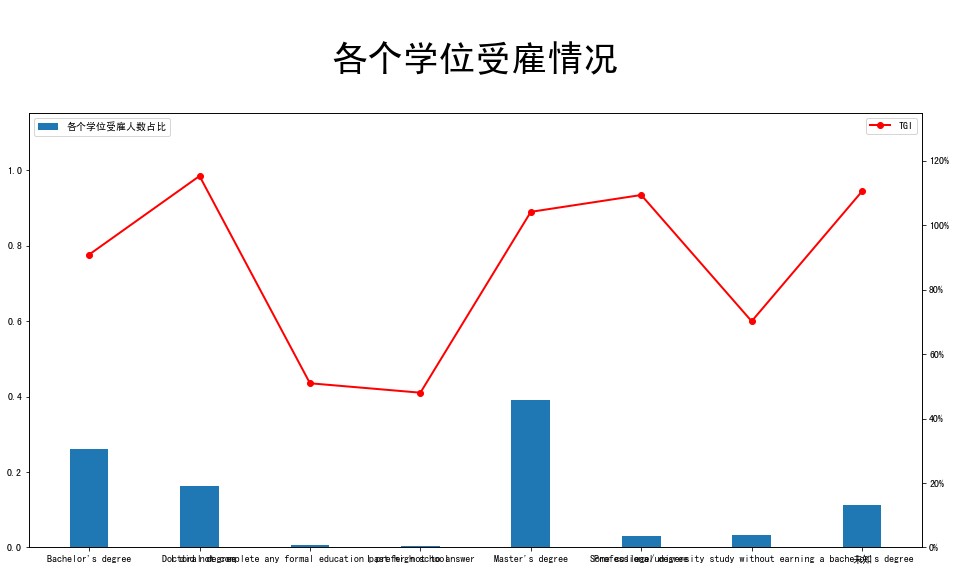

In [19]:
# 画图

x = t_degree_job[t_degree_job['FormalEducation']!='总计'].FormalEducation
y1 = t_degree_job[t_degree_job['FormalEducation']!='总计'].per_of_employed
y2 = t_degree_job[t_degree_job['FormalEducation']!='总计'].tgi

plt.figure(figsize=(16,8))
plt.subplot(111)
 
# 柱形宽度
bar_width = 0.35
 
# 在主坐标轴绘制柱形图
plt.bar(x,y1,bar_width,label='各个学位受雇人数占比')
 
# 设置坐标轴的取值范围，避免柱子过高而与图例重叠
plt.ylim(0,max(y1.max(),y2.max()))
 
# 设置图例
plt.legend(loc='upper left')
 
# 设置横坐标的标签
plt.xticks(x)
 
# 在次坐标轴上绘制折线图
plt.twinx()
# ls:线的类型，lw：宽度，o：在顶点处实心圈
plt.plot(x,y2,ls='-',lw=2,color='r',marker='o',label='TGI')
 
# 设置次坐标轴的取值范围，避免折线图波动过大
plt.ylim(0,1.35)
 
# 设置图例
plt.legend()
 
# 定义显示百分号的函数
def to_percent(number, position=0):
    return '%.f' % (number * 100) + '%'
 
# 次坐标轴的标签显示百分号 FuncFormatter：自定义格式函数包
from matplotlib.ticker import FuncFormatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
 
# 设置标题
plt.title('\n各个学位受雇情况\n',fontsize=36,loc='center',color = 'k')
plt.show()

明显可以看出，还是Doctoral degree，Master's degree，Professional degree这三种高学历和专业人士的TGI更高，对找到工作更有影响。

## 高学历和专业人士，对明年将学习机器学习工具的看法

In [22]:
# 这里认为，Doctoral degree，Master's degree，Professional degree这三种为高学历的人士
df_target_data['high_educated'] = 0
df_target_data.loc[df_target_data['FormalEducation'].isin(['Doctoral degree',"Master's degree", 'Professional degree']),'high_educated']=1

In [23]:
# 大致查看一下看法分布
df_target_data.MLToolNextYearSelect.value_counts()

TensorFlow                                            2621
Python                                                1713
R                                                      910
Spark / MLlib                                          755
Hadoop/Hive/Pig                                        417
Other                                                  407
Amazon Machine Learning                                392
Jupyter notebooks                                      358
I don't plan on learning a new tool/technology         341
Google Cloud Compute                                   296
Amazon Web services                                    273
Julia                                                  222
DataRobot                                              220
Microsoft Azure Machine Learning                       220
IBM Watson / Waton Analytics                           194
C/C++                                                  186
Tableau                                                1

In [24]:
# 在看一下的缺失值
print('MLToolNextYearSelect列数据缺失率：%.2f%%'%(df_target_data[df_target_data['MLToolNextYearSelect'].isna()].shape[0] *100 / df_target_data.shape[0]))

MLToolNextYearSelect列数据缺失率：34.21%


In [26]:
# 把空值填充
df_target_data['MLToolNextYearSelect'].replace({np.nan:'未知'}, inplace=True)

# 查看分布
t_tool = df_target_data.groupby('MLToolNextYearSelect').agg({'high_educated':'sum','age_1':'sum'}).reset_index().rename({'age_1':'count'},axis=1)
# 计算受聘率
t_tool['rate_of_high_educated'] = t_tool['high_educated'] / t_tool['count']
# 计算每个年龄阶段受雇人数占所有受雇人数的比重
t_tool['per_of_high_educated'] = t_tool['high_educated'] / t_tool['high_educated'].sum()

# 增加total行
t_tool.loc['total','MLToolNextYearSelect'] = '总计'
t_tool.loc['total','high_educated'] = t_tool['high_educated'].sum()
t_tool.loc['total','count'] = t_tool['count'].sum()
t_tool.loc['total','rate_of_high_educated'] = t_tool.loc['total','high_educated'] / t_tool.loc['total','count']
t_tool.loc['total','per_of_high_educated'] = 1

# 计算每个学历的TGI
t_tool['tgi'] = t_tool['rate_of_high_educated'] / t_tool.loc['total','rate_of_high_educated']
t_tool

,MLToolNextYearSelect,high_educated,count,rate_of_high_educated,per_of_high_educated,tgi
0,Amazon Machine Learning,228.00,392.00,0.58,0.03,1.07
1,Amazon Web services,170.00,273.00,0.62,0.02,1.15
2,Angoss,0.00,1.00,0.00,0.00,0.00
3,C/C++,105.00,186.00,0.56,0.01,1.04
4,Cloudera,28.00,44.00,0.64,0.00,1.17
5,DataRobot,128.00,220.00,0.58,0.01,1.07
6,Flume,9.00,16.00,0.56,0.00,1.04
7,Google Cloud Compute,195.00,296.00,0.66,0.02,1.21
8,Hadoop/Hive/Pig,250.00,417.00,0.60,0.03,1.10
9,I don't plan on learning a new tool/technology,220.00,341.00,0.65,0.02,1.19


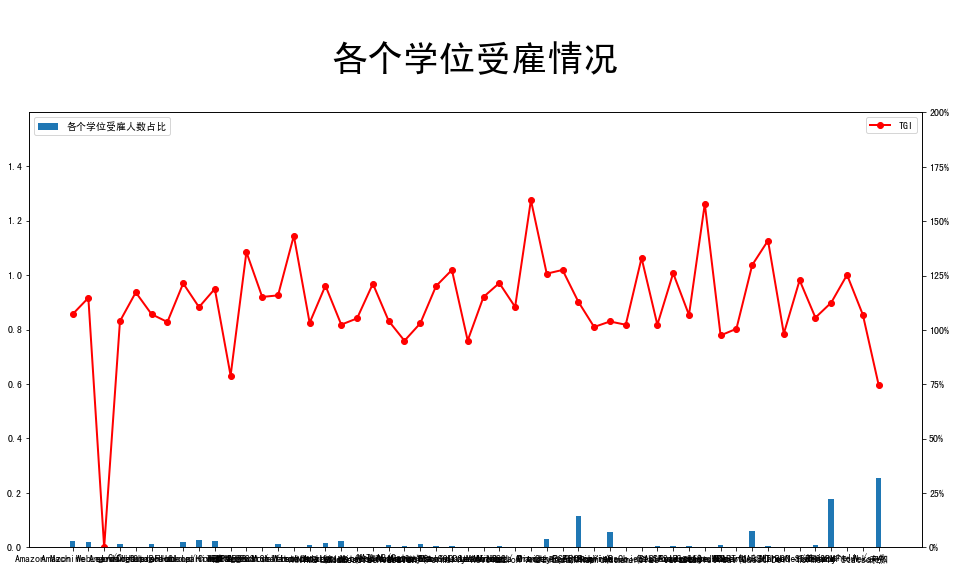

In [37]:
# 画图

x = t_tool[t_tool['MLToolNextYearSelect']!='总计'].MLToolNextYearSelect
y1 = t_tool[t_tool['MLToolNextYearSelect']!='总计'].per_of_high_educated
y2 = t_tool[t_tool['MLToolNextYearSelect']!='总计'].tgi

plt.figure(figsize=(16,8))
plt.subplot(111)
 
# 柱形宽度
bar_width = 0.35
 
# 在主坐标轴绘制柱形图
plt.bar(x,y1,bar_width,label='各个学位受雇人数占比')
 
# 设置坐标轴的取值范围，避免柱子过高而与图例重叠
plt.ylim(0,max(y1.max(),y2.max()))
 
# 设置图例
plt.legend(loc='upper left')
 
# 设置横坐标的标签
plt.xticks(x)
 
# 在次坐标轴上绘制折线图
plt.twinx()
# ls:线的类型，lw：宽度，o：在顶点处实心圈
plt.plot(x,y2,ls='-',lw=2,color='r',marker='o',label='TGI')
 
# 设置次坐标轴的取值范围，避免折线图波动过大
plt.ylim(0,2)
 
# 设置图例
plt.legend()
 
# 定义显示百分号的函数
def to_percent(number, position=0):
    return '%.f' % (number * 100) + '%'
 
# 次坐标轴的标签显示百分号 FuncFormatter：自定义格式函数包
from matplotlib.ticker import FuncFormatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
 
# 设置标题
plt.title('\n各个学位受雇情况\n',fontsize=36,loc='center',color = 'k')
plt.show()

In [39]:
# 这里面数据过多，直接进行TGI倒序排列
t_tool.sort_values('tgi',ascending=False)

,MLToolNextYearSelect,high_educated,count,rate_of_high_educated,per_of_high_educated,tgi
29,Orange,13.00,15.00,0.87,0.00,1.60
40,SAS JMP,6.00,7.00,0.86,0.00,1.58
14,Impala,7.00,9.00,0.78,0.00,1.43
44,Stan,49.00,64.00,0.77,0.01,1.41
11,IBM SPSS Modeler,14.00,19.00,0.74,0.00,1.36
36,RapidMiner (free version),26.00,36.00,0.72,0.00,1.33
43,Spark / MLlib,532.00,755.00,0.70,0.06,1.30
24,Microsoft R Server (Formerly Revolution Analyt...,45.00,65.00,0.69,0.00,1.28
31,Perl,9.00,13.00,0.69,0.00,1.28
38,SAS Base,39.00,57.00,0.68,0.00,1.26


In [41]:
# 这里面有的工具，虽然tgi高，但是样本太少了，统计结果不具有指导意义。
# 所以把样本数太少的去掉（去掉样本数少于100的）
t_tool[t_tool['count']>=100].sort_values('tgi',ascending=False)
# t_tool.sort_values('tgi',ascending=False)

,MLToolNextYearSelect,high_educated,count,rate_of_high_educated,per_of_high_educated,tgi
43,Spark / MLlib,532.00,755.00,0.70,0.06,1.30
30,Other,278.00,407.00,0.68,0.03,1.26
7,Google Cloud Compute,195.00,296.00,0.66,0.02,1.21
16,Julia,145.00,222.00,0.65,0.02,1.20
9,I don't plan on learning a new tool/technology,220.00,341.00,0.65,0.02,1.19
13,IBM Watson / Waton Analytics,122.00,194.00,0.63,0.01,1.16
1,Amazon Web services,170.00,273.00,0.62,0.02,1.15
32,Python,1050.00,1713.00,0.61,0.12,1.13
48,TensorFlow,1601.00,2621.00,0.61,0.18,1.13
8,Hadoop/Hive/Pig,250.00,417.00,0.60,0.03,1.10


这里可见：Spark，Google Cloud Compute，Julia。这三个全是大数据分析工具，计算速度更快的工具。

## 高学历和专业人士，对明年将学习机器学习工具的看法

In [42]:
# 把空值填充
df_target_data['MLMethodNextYearSelect'].replace({np.nan:'未知'}, inplace=True)

# 查看分布
t_method = df_target_data.groupby('MLMethodNextYearSelect').agg({'high_educated':'sum','age_1':'sum'}).reset_index().rename({'age_1':'count'},axis=1)
# 计算受聘率
t_method['rate_of_high_educated'] = t_method['high_educated'] / t_method['count']
# 计算每个年龄阶段受雇人数占所有受雇人数的比重
t_method['per_of_high_educated'] = t_method['high_educated'] / t_method['high_educated'].sum()

# 增加total行
t_method.loc['total','MLMethodNextYearSelect'] = '总计'
t_method.loc['total','high_educated'] = t_method['high_educated'].sum()
t_method.loc['total','count'] = t_method['count'].sum()
t_method.loc['total','rate_of_high_educated'] = t_method.loc['total','high_educated'] / t_method.loc['total','count']
t_method.loc['total','per_of_high_educated'] = 1

# 计算每个学历的TGI
t_method['tgi'] = t_method['rate_of_high_educated'] / t_method.loc['total','rate_of_high_educated']
t_method

,MLMethodNextYearSelect,high_educated,count,rate_of_high_educated,per_of_high_educated,tgi
0,Anomaly Detection,205.00,307.00,0.67,0.02,1.23
1,Association Rules,33.00,46.00,0.72,0.00,1.32
2,Bayesian Methods,334.00,511.00,0.65,0.04,1.20
3,Cluster Analysis,135.00,216.00,0.62,0.01,1.15
4,Decision Trees,82.00,156.00,0.53,0.01,0.97
5,Deep learning,2707.00,4362.00,0.62,0.30,1.14
6,"Ensemble Methods (e.g. boosting, bagging)",178.00,269.00,0.66,0.02,1.22
7,Factor Analysis,44.00,76.00,0.58,0.00,1.07
8,Genetic & Evolutionary Algorithms,251.00,425.00,0.59,0.03,1.09
9,I don't plan on learning a new ML/DS method,119.00,195.00,0.61,0.01,1.12


In [43]:
# 这里面有的工具，虽然tgi高，但是样本太少了，统计结果不具有指导意义。
# 所以把样本数太少的去掉（去掉样本数少于100的）
t_method[t_method['count']>=100].sort_values('tgi',ascending=False)

,MLMethodNextYearSelect,high_educated,count,rate_of_high_educated,per_of_high_educated,tgi
14,Other,180.00,258.00,0.70,0.02,1.29
12,Monte Carlo Methods,159.00,230.00,0.69,0.02,1.27
21,Survival Analysis,71.00,104.00,0.68,0.01,1.26
0,Anomaly Detection,205.00,307.00,0.67,0.02,1.23
6,"Ensemble Methods (e.g. boosting, bagging)",178.00,269.00,0.66,0.02,1.22
2,Bayesian Methods,334.00,511.00,0.65,0.04,1.20
3,Cluster Analysis,135.00,216.00,0.62,0.01,1.15
23,Time Series Analysis,425.00,680.00,0.62,0.05,1.15
5,Deep learning,2707.00,4362.00,0.62,0.30,1.14
19,Social Network Analysis,224.00,364.00,0.62,0.02,1.13


这里可见，高学历和专业人群认为这三种方法更重要：Monte Carlo Methods，Survival Analysis，Anomaly Detection。